In [1]:
#https://github.com/am-shb/gwo-feature-selection

In [2]:
pip install --upgrade seaborn

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 10.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats  

In [4]:
import numpy as np
import pandas as pd

from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import random
import numpy
import math
import time

In [5]:
from typing import Callable
import matplotlib.pyplot as plt

# Data handling
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

2024-07-04 17:31:39.706181: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9360] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-04 17:31:39.706240: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-04 17:31:39.706270: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1537] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-04 17:31:39.714348: I tensorflow/core/platform/cpu_feature_guard.cc:183] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2 AVX, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
import numpy as np

def GWO(objf,lb,ub,dim,SearchAgents_no,Max_iter):
    
    
    #Max_iter=1000
    #lb=-100
    #ub=100
    #dim=30  
    #SearchAgents_no=5
    
    # initialize alpha, beta, and delta_pos
    Alpha_pos=np.zeros(dim)
    Alpha_score=float("inf")
    
    Beta_pos=np.zeros(dim)
    Beta_score=float("inf")
    
    Delta_pos=np.zeros(dim)
    Delta_score=float("inf")

    if not isinstance(lb, list):
        lb = [lb] * dim
    if not isinstance(ub, list):
        ub = [ub] * dim
    
    #Initialize the positions of search agents
    Positions = np.zeros((SearchAgents_no, dim))
    for i in range(dim):
        Positions[:, i] = np.random.uniform(0,1, SearchAgents_no) * (ub[i] - lb[i]) + lb[i]
    
    Convergence_curve=np.zeros(Max_iter)

     # Loop counter
    print("GWO is optimizing  \""+objf.__name__+"\"")    
    
    timerStart=time.time() 
    # Main loop
    for l in range(0,Max_iter):
        for i in range(0,SearchAgents_no):
            
            # Return back the search agents that go beyond the boundaries of the search space
            for j in range(dim):
                Positions[i,j]=np.clip(Positions[i,j], lb[j], ub[j])

            # Calculate objective function for each search agent
            fitness=objf(Positions[i,:])
            
            # Update Alpha, Beta, and Delta
            if fitness<Alpha_score :
                Alpha_score=fitness; # Update alpha
                Alpha_pos=Positions[i,:].copy()
            
            
            if (fitness>Alpha_score and fitness<Beta_score ):
                Beta_score=fitness  # Update beta
                Beta_pos=Positions[i,:].copy()
            
            
            if (fitness>Alpha_score and fitness>Beta_score and fitness<Delta_score): 
                Delta_score=fitness # Update delta
                Delta_pos=Positions[i,:].copy()
            
        
        
        
        a=2-l*((2)/Max_iter); # a decreases linearly from 2 to 0
        
        # Update the Position of search agents including omegas
        for i in range(0,SearchAgents_no):
            for j in range (0,dim):     
                           
                r1=random.random() # r1 is a random number in [0,1]
                r2=random.random() # r2 is a random number in [0,1]
                
                A1=2*a*r1-a; # Equation (3.3)
                C1=2*r2; # Equation (3.4)
                
                D_alpha=abs(C1*Alpha_pos[j]-Positions[i,j]); # Equation (3.5)-part 1
                X1=Alpha_pos[j]-A1*D_alpha; # Equation (3.6)-part 1
                           
                r1=random.random()
                r2=random.random()
                
                A2=2*a*r1-a; # Equation (3.3)
                C2=2*r2; # Equation (3.4)
                
                D_beta=abs(C2*Beta_pos[j]-Positions[i,j]); # Equation (3.5)-part 2
                X2=Beta_pos[j]-A2*D_beta; # Equation (3.6)-part 2       
                
                r1=random.random()
                r2=random.random() 
                
                A3=2*a*r1-a; # Equation (3.3)
                C3=2*r2; # Equation (3.4)
                
                D_delta=abs(C3*Delta_pos[j]-Positions[i,j]); # Equation (3.5)-part 3
                X3=Delta_pos[j]-A3*D_delta; # Equation (3.5)-part 3             
                
                Positions[i,j]=(X1+X2+X3)/3  # Equation (3.7)
                
            
        
        
        Convergence_curve[l]=Alpha_score;

        if (l%1==0):
               print(['At iteration '+ str(l)+ ' the best fitness is '+ str(Alpha_score)]);
               print('alpha:', np.where(Alpha_pos>0.5)[0])
    
    timerEnd=time.time()
    print('Completed in', (timerEnd - timerStart))
    
    
    return Alpha_pos    

In [7]:
def create_model(input_shape):
    model = Sequential()
    model.add(Dense(50, activation='relu', input_shape=input_shape))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(150, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(4, activation='softmax'))
    model.summary()
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [8]:
def fitness_function(positions):
    features = np.where(positions>=0.4999)[0]
    #print('selected_features:', features)
    
    #print(train_df.head())

    train_xf = train_x.iloc[:, features]
    test_xf = test_x.iloc[:, features]

    model = Sequential()
    model.add(Dense(50, input_dim=len(features), activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(150, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(4, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    # Train the model
    model.fit(train_xf, trainy_one_hot, epochs=50, batch_size=32, verbose=0)
    
    # Evaluate the model
    loss, accuracy = model.evaluate(test_xf, testy_one_hot, verbose=0)
    
    w = 0.9
    return -(w * accuracy + (1 - w) * 1 / (len(features)))


In [9]:
# Load the data
data_df = pd.read_csv('mobile_price_dataset/train.csv')
data_df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [10]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

/tmp/ipykernel_130/1044639550.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = data_df, x="price_range", palette="viridis")


Text(0.5, 1.0, 'Label')

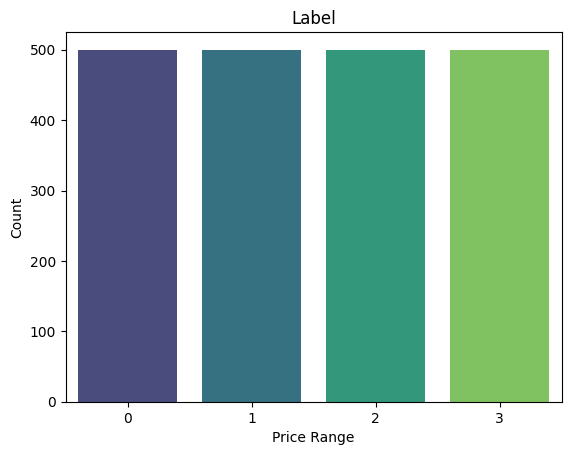

In [11]:
# 레이블 갯수 확인 (그래프)
sns.countplot(data = data_df, x="price_range", palette="viridis")
plt.xlabel("Price Range")
plt.ylabel("Count")
plt.title("Label")

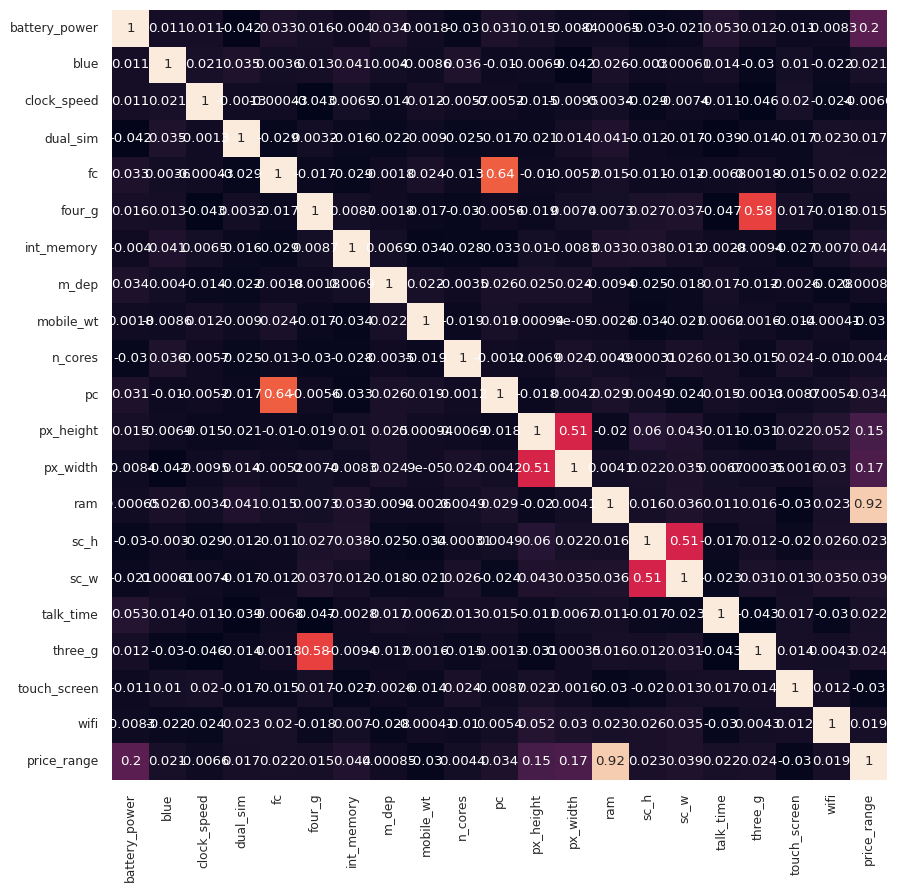

In [12]:
df_corr=data_df.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [13]:
last_row_corr = df_corr.iloc[-1]

last_row_corr 

battery_power    0.200723
blue             0.020573
clock_speed     -0.006606
dual_sim         0.017444
fc               0.021998
four_g           0.014772
int_memory       0.044435
m_dep            0.000853
mobile_wt       -0.030302
n_cores          0.004399
pc               0.033599
px_height        0.148858
px_width         0.165818
ram              0.917046
sc_h             0.022986
sc_w             0.038711
talk_time        0.021859
three_g          0.023611
touch_screen    -0.030411
wifi             0.018785
price_range      1.000000
Name: price_range, dtype: float64

In [14]:
data_df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [15]:
data_df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [ ]:
X = data_df[['battery_power', 'px_height','px_width', 'ram']]

In [ ]:
X

In [ ]:
y = data_df[['price_range']]
y

In [19]:
num_features = data_df.shape[1]

In [20]:
train_x, test_x, train_y, test_y = train_test_split(X, y,test_size=0.25,random_state=0)
print ('train_x shape:', train_x.shape)
print ('train_y shape:', train_y.shape)
print ('test_x shape:', test_x.shape)
print ('test_y shape:', test_y.shape)

train_x shape: (1500, 4)
train_y shape: (1500, 1)
test_x shape: (500, 4)
test_y shape: (500, 1)


In [21]:
trainy_one_hot = to_categorical(train_y)
testy_one_hot = to_categorical(test_y)

In [22]:
trainy_one_hot.shape

(1500, 4)

In [23]:
model = create_model(train_x.shape[1:])
model.fit(train_x, trainy_one_hot, epochs=30, batch_size=32, validation_data=(test_x, testy_one_hot))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                250       
                                                                 
 dense_1 (Dense)             (None, 100)               5100      
                                                                 
 dense_2 (Dense)             (None, 150)               15150     
                                                                 
 dense_3 (Dense)             (None, 100)               15100     
                                                                 
 dense_4 (Dense)             (None, 50)                5050      
                                                                 
 dense_5 (Dense)             (None, 4)                 204       
                                                                 
Total params: 40854 (159.59 KB)
Trainable params: 40854 

2024-07-04 17:31:44.006402: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1883] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 38698 MB memory:  -> device: 0, name: CUDA GPU, pci bus id: 0000:8c:00.0, compute capability: 8.0
2024-07-04 17:31:44.008732: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1883] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 38698 MB memory:  -> device: 1, name: CUDA GPU, pci bus id: 0000:c8:00.0, compute capability: 8.0
2024-07-04 17:31:45.496872: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f1894fbfc50 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-07-04 17:31:45.496914: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): CUDA GPU, Compute Capability 8.0
2024-07-04 17:31:45.496922: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (1): CUDA GPU, Compute Capability 8.0
2024-07-04 17:31:45.502289: I t

47/47 [==============================] - 2s 8ms/step - loss: 10.4266 - accuracy: 0.4280 - val_loss: 2.9702 - val_accuracy: 0.4480
Epoch 2/30
47/47 [==============================] - 0s 4ms/step - loss: 2.6353 - accuracy: 0.4860 - val_loss: 2.5120 - val_accuracy: 0.3920
Epoch 3/30
47/47 [==============================] - 0s 4ms/step - loss: 2.2878 - accuracy: 0.4640 - val_loss: 1.6780 - val_accuracy: 0.4360
Epoch 4/30
47/47 [==============================] - 0s 4ms/step - loss: 2.0499 - accuracy: 0.4880 - val_loss: 1.8290 - val_accuracy: 0.4380
Epoch 5/30
47/47 [==============================] - 0s 4ms/step - loss: 1.8502 - accuracy: 0.5000 - val_loss: 1.5475 - val_accuracy: 0.5360
Epoch 6/30
47/47 [==============================] - 0s 4ms/step - loss: 2.0506 - accuracy: 0.4933 - val_loss: 1.4461 - val_accuracy: 0.4780
Epoch 7/30
47/47 [==============================] - 0s 4ms/step - loss: 1.7835 - accuracy: 0.5040 - val_loss: 1.1205 - val_accuracy: 0.5740
Epoch 8/30
47/47 [============

# Gwo-Feature-Selection

In [24]:
num_features = 20

In [25]:
# Load the data
data_df = pd.read_csv('mobile_price_dataset/train.csv')

In [26]:
train_data, test_data = train_test_split(data_df)

In [27]:
#train_data = pd.read_csv('mobile_price_dataset/train.csv')

In [28]:
#test_data = pd.read_csv('mobile_price_dataset/test.csv')

In [29]:
train_x, test_x, train_y, test_y = train_data.iloc[:, :num_features], test_data.iloc[:, :num_features], train_data.iloc[:, -1], test_data.iloc[:, -1]
print ('train_x shape:', train_x.shape)
print ('train_y shape:', train_y.shape)
print ('test_x shape:', test_x.shape)
print ('test_y shape:', test_y.shape)

train_x shape: (1500, 20)
train_y shape: (1500,)
test_x shape: (500, 20)
test_y shape: (500,)


In [30]:
trainy_one_hot = to_categorical(train_y)
testy_one_hot = to_categorical(test_y)

In [31]:
print(trainy_one_hot.shape)

(1500, 4)


In [32]:
#train_y = train_df.iloc[:, 41]
#test_y = test_df.iloc[:, 41]


# Feature selection using GWO

fit = GWO(fitness_function, 0, 1, num_features, 10, 20)
selected_features = np.where(fit>0.5)[0]
#selected_features = [9,13,14,39]
print(selected_features)

train_x = train_x.iloc[:, selected_features]
test_x = test_x.iloc[:, selected_features]

'''
knn_classifier = KNeighborsClassifier(n_neighbors=7)
knn_classifier.fit(train_x, train_y)


predicted = knn_classifier.predict(test_x)
print(confusion_matrix(test_y, predicted))
print(accuracy_score(test_y, predicted))
'''

GWO is optimizing  "fitness_function"
['At iteration 0 the best fitness is -0.6321111089653438']
alpha: [ 0  5  7  8  9 13 16 17 18]
['At iteration 1 the best fitness is -0.6680000257492066']
alpha: [ 6  9 13 17 18]
['At iteration 2 the best fitness is -0.6680000257492066']
alpha: [ 6  9 13 17 18]
['At iteration 3 the best fitness is -0.6694000184535981']
alpha: [ 2  5  6 13]
['At iteration 4 the best fitness is -0.6694000184535981']
alpha: [ 2  5  6 13]
['At iteration 5 the best fitness is -0.6694000184535981']
alpha: [ 2  5  6 13]
['At iteration 6 the best fitness is -0.6694000184535981']
alpha: [ 2  5  6 13]
['At iteration 7 the best fitness is -0.6818000197410583']
alpha: [ 6 13]
['At iteration 8 the best fitness is -0.7124000012874603']
alpha: [13 16]
['At iteration 9 the best fitness is -0.7141999781131745']
alpha: [ 2 13]
['At iteration 10 the best fitness is -0.7141999781131745']
alpha: [ 2 13]
['At iteration 11 the best fitness is -0.7141999781131745']
alpha: [ 2 13]
['At iter

'\nknn_classifier = KNeighborsClassifier(n_neighbors=7)\nknn_classifier.fit(train_x, train_y)\n\n\npredicted = knn_classifier.predict(test_x)\nprint(confusion_matrix(test_y, predicted))\nprint(accuracy_score(test_y, predicted))\n'

In [33]:
model = create_model(train_x.shape[1:])
history = model.fit(train_x, trainy_one_hot, epochs=30, batch_size=32, validation_data=(test_x, testy_one_hot))

Model: "sequential_201"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1206 (Dense)          (None, 50)                100       
                                                                 
 dense_1207 (Dense)          (None, 100)               5100      
                                                                 
 dense_1208 (Dense)          (None, 150)               15150     
                                                                 
 dense_1209 (Dense)          (None, 100)               15100     
                                                                 
 dense_1210 (Dense)          (None, 50)                5050      
                                                                 
 dense_1211 (Dense)          (None, 4)                 204       
                                                                 
Total params: 40704 (159.00 KB)
Trainable params: 40

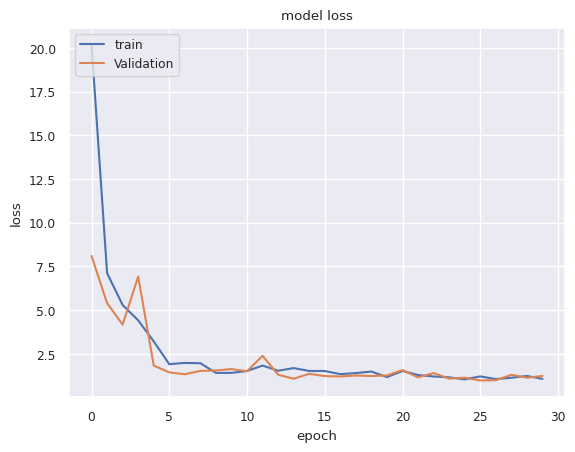

In [34]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

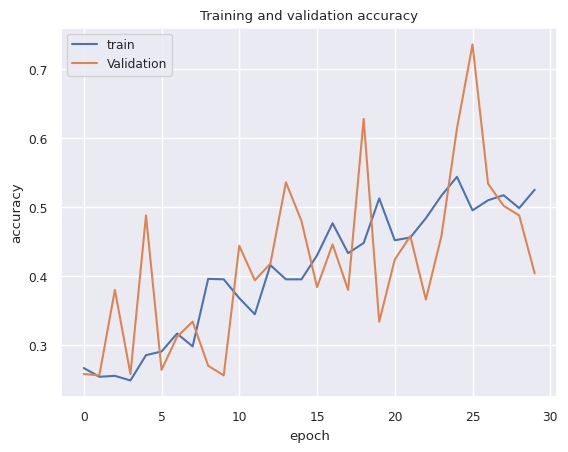

In [35]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

16/16 [==============================] - 0s 1ms/step
f1_score =  0.31932593873517784
0.404
              precision    recall  f1-score   support

           0       0.90      0.60      0.72       115
           1       0.00      0.00      0.00       128
           2       0.04      0.03      0.04       128
           3       0.39      1.00      0.56       129

    accuracy                           0.40       500
   macro avg       0.33      0.41      0.33       500
weighted avg       0.32      0.40      0.32       500



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Axes: >

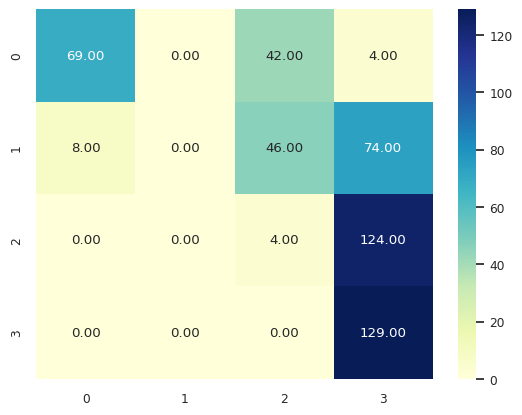

In [38]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score, f1_score

y_pred=model.predict(test_x)
y_pred = np.argmax(y_pred, axis=-1)
y_true = np.argmax(testy_one_hot, axis=-1)

LABELS = ['0','1','2','3']
cm=confusion_matrix(y_true,y_pred)

#print(cm)
print('f1_score = ', f1_score(y_true, y_pred, average='weighted'))
print(accuracy_score(y_true,y_pred))
print(classification_report(y_true,y_pred))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')